# Introduction to Quality Data & Engineering with Python
## Lecture 4 - EDA, Data Cleaning & Preparation Tutorial

### Task 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Task 2: Load the Dataset

https://tubcloud.tu-berlin.de/s/y4FtN6zg8oTKZRJ/download/titanic.csv

| Feature     | Description                                        |
|-------------|----------------------------------------------------|
| survived    | Whether the passenger survived (0 = No, 1 = Yes)   |
| pclass      | Ticket class (1 = First, 2 = Second, 3 = Third)    |
| sex         | Gender of the passenger (male, female)             |
| age         | Age of the passenger in years                      |
| sibsp       | Number of siblings/spouses aboard the Titanic      |
| parch       | Number of parents/children aboard the Titanic      |
| fare        | Fare paid by the passenger                          |
| embarked    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |
| class       | Ticket class (as a string: First, Second, Third)   |
| who         | Person's title (man, woman, child)                 |
| deck        | Deck where the passenger's cabin was located       |
| embark_town | Town where the passenger embarked                  |
| alive       | Whether the passenger survived (yes, no)            |
| alone       | Whether the passenger traveled alone (True, False) |


In [2]:
df = pd.read_csv("https://tubcloud.tu-berlin.de/s/y4FtN6zg8oTKZRJ/download/titanic.csv")

### Task 3: Explore the Dataset

### Task 3.1: Display the first 5 rows of your DataFrame

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Task 3.1: Display the last 5 rows of your DataFrame

In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### Task 3.2: Display summary statistics of numerical columns

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Task 3.3: Check data types and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### Task 3.4: Check the number of women and men in the dataset

In [7]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

### Task 3.5: Check the number of unique values in the 'sex' column of the DataFrame

In [8]:
df["sex"].nunique()

2

### Task 3.6: Show all the passengers' data whose embarked value is not 'S'

In [9]:
df[(df["embarked"] == "C") | (df["embarked"] == "Q")].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True


In [10]:
df[df["embarked"] != "S"].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True


### Task 3.7: Show all information for passengers who are women and under 30 years old

In [11]:
df[(df["age"] < 30) & (df["sex"]== "female" )].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True


### Task 4: Data Cleaning

### Task 4.1: Check for missing values

In [12]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df.isnull().sum().sum()

869

### Task 4.2: Handle missing values in Age column

hint: Fill missing values with median.

In [23]:
df["age"].median()

28.0

In [15]:
df["age"] = df["age"].fillna(df["age"].median())

# df['age'].fillna(df['age'].median(), inplace=True)

In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Task 4.3: Handle missing values in "embarked" column

hint: Fill missing values with mode.

In [17]:
df["embarked"].mode()

0    S
Name: embarked, dtype: object

In [18]:
type(df["embarked"].mode())

pandas.core.series.Series

In [19]:
df["embarked"].mode()[0]

'S'

In [20]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [21]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Task 4.4: Handle missing values in "deck" column

hint: Fill missing values with mode.

In [22]:
df["deck"].mode()[0]

'C'

In [23]:
df["deck"] = df["deck"].fillna(df["deck"].mode()[0])

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

### Task 4.5: Drop the rest of NaN rows.

In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### Task 4.7: Change data type of 'embarked' column to category

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         889 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


In [28]:
df['embarked'] = df['embarked'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    category
 8   class        889 non-null    object  
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         889 non-null    object  
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(6)
memory usage: 93.0+ KB


### Task 4.6: Drop "who" column

In [30]:
df = df.drop("who", axis = 1)

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,C,Southampton,no,True


### Task 4.8: Detect outliers in "Fare" column using box plot

<Figure size 432x864 with 0 Axes>

<AxesSubplot:>

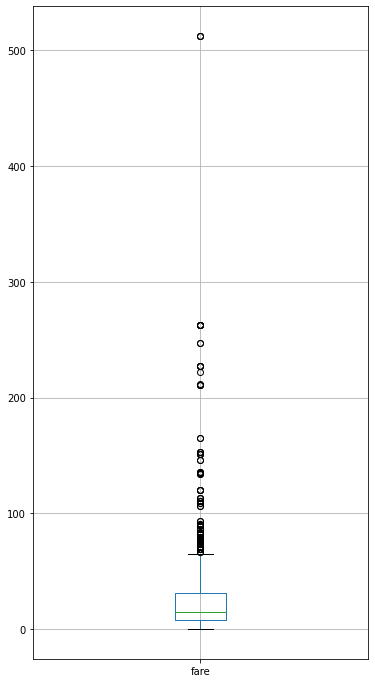

In [32]:
plt.figure(figsize=(6,12))

df.boxplot(column = "fare")
plt.show()

### Task 4.9: Remove outliers using IQR method

In [33]:
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3 - Q1

In [34]:
Q1

7.8958

In [35]:
Q3

31.0

In [36]:
IQR

23.1042

In [37]:
Q3 + 1.5*(IQR)

65.6563

In [38]:
upper_limit = Q3 + 1.5*(IQR)

In [39]:
df["fare"] = np.where(df["fare"] > upper_limit, upper_limit, df["fare"])

<Figure size 432x864 with 0 Axes>

<AxesSubplot:>

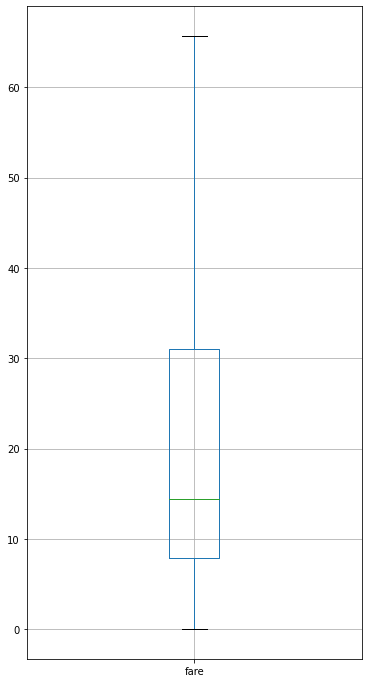

In [40]:
plt.figure(figsize=(6,12))

df.boxplot(column = "fare")
plt.show()

### Task 5: Data Visualization

### Task 5.1: Create a bar plot for class vs. fare

<AxesSubplot:xlabel='class'>

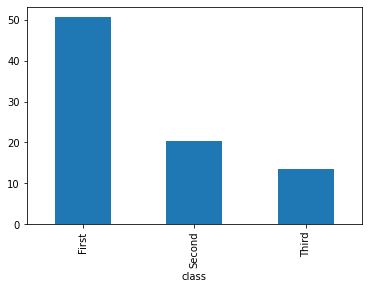

In [41]:
fare_by_class = df.groupby('class')['fare'].mean()
fare_by_class.plot(kind='bar')
plt.show()

### Task 5.2: Create a bar plot for "survived"

In [42]:
df['survived'].value_counts()

0    549
1    340
Name: survived, dtype: int64

<AxesSubplot:>

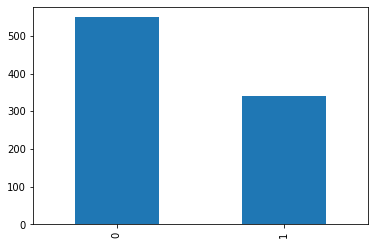

In [43]:
survived_count = df['survived'].value_counts()
survived_count.plot(kind='bar')
plt.show()

### Task 5.3: Create histogram for 'Age'

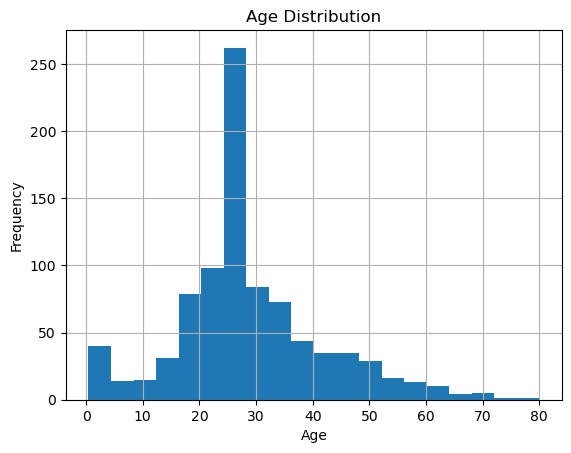

In [66]:
df['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Task 5.4: Create a boxplot for using "pclass" and "age"

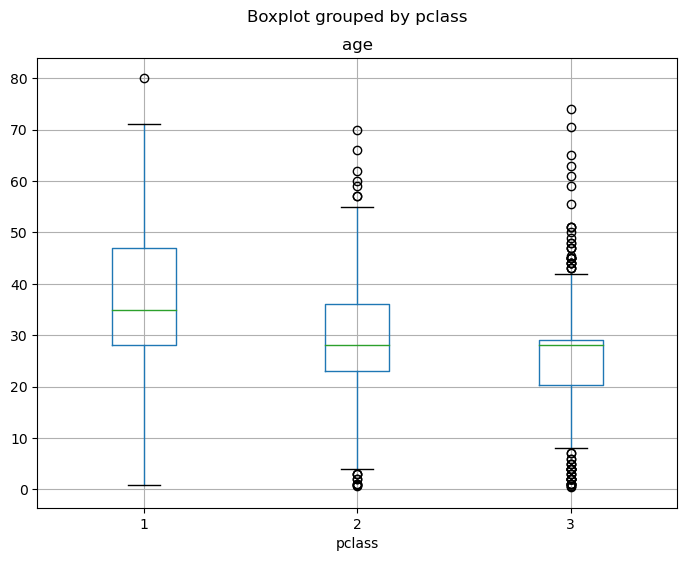

In [67]:
df.boxplot(column='age', by='pclass', figsize=(8, 6))
plt.show()

### Task 5.5: Create a heatmap for numerical columns

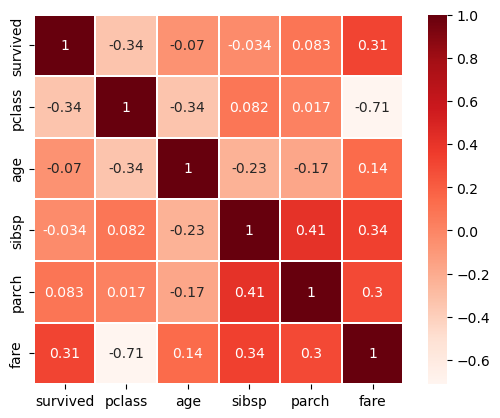

In [68]:
num_cols = ["survived","pclass","age","sibsp","parch","fare"]

sns.heatmap(df[num_cols].corr(), annot=True, linewidths=.2, cmap='Reds', square=True)
plt.show()

### Task 6: Data Preparation

### Task 6.1: Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'

In [69]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,65.6563,C,First,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,C,Southampton,no,True


In [70]:
df["new_FAMILYSIZE"] = df["sibsp"] + df["parch"] + 1

In [71]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,new_FAMILYSIZE
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False,2
1,1,1,female,38.0,1,0,65.6563,C,First,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,True,C,Southampton,no,True,1


In [72]:
df.loc[(df['age'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['age'] >= 18) & (df['age'] < 35), 'NEW_AGE_CAT'] = 'middle_age'
df.loc[(df['age'] >= 35) & (df['age'] < 55), 'NEW_AGE_CAT'] = 'above_middle_age'
df.loc[(df['age'] >= 55), 'NEW_AGE_CAT'] = 'old'

In [73]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,new_FAMILYSIZE,NEW_AGE_CAT
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False,2,middle_age
1,1,1,female,38.0,1,0,65.6563,C,First,False,C,Cherbourg,yes,False,2,above_middle_age
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True,1,middle_age
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,2,above_middle_age
4,0,3,male,35.0,0,0,8.0500,S,Third,True,C,Southampton,no,True,1,above_middle_age


### Task 6.2: Convert DataFrame column names to lowercase

In [75]:
df.columns = [col.lower() for col in df.columns]

In [76]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,new_familysize,new_age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False,2,middle_age
1,1,1,female,38.0,1,0,65.6563,C,First,False,C,Cherbourg,yes,False,2,above_middle_age
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True,1,middle_age
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,2,above_middle_age
4,0,3,male,35.0,0,0,8.0500,S,Third,True,C,Southampton,no,True,1,above_middle_age


In [77]:
df.rename(columns = {"new_familysize" : "family_size", "new_age_cat" : "age_cat"})

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone,family_size,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,True,C,Southampton,no,False,2,middle_age
1,1,1,female,38.0,1,0,65.6563,C,First,False,C,Cherbourg,yes,False,2,above_middle_age
2,1,3,female,26.0,0,0,7.9250,S,Third,False,C,Southampton,yes,True,1,middle_age
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,2,above_middle_age
4,0,3,male,35.0,0,0,8.0500,S,Third,True,C,Southampton,no,True,1,above_middle_age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,C,Southampton,no,True,1,middle_age
887,1,1,female,19.0,0,0,30.0000,S,First,False,B,Southampton,yes,True,1,middle_age
888,0,3,female,28.0,1,2,23.4500,S,Third,False,C,Southampton,no,False,4,middle_age
889,1,1,male,26.0,0,0,30.0000,C,First,True,C,Cherbourg,yes,True,1,middle_age
